In [1]:
#Array Operations
import numpy as np
import pandas as pd

#Image Plots
import matplotlib.pyplot as plt

#Path Finding
import os
import cv2
# !pip install opencv-python


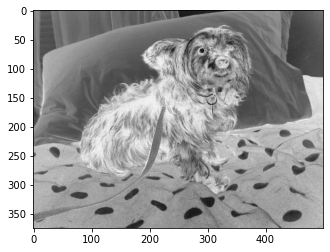

In [2]:
Datadir=os.path.join(os.getcwd(),"kagglecatsanddogs_5340","PetImages")
Categories=['Dog','Cat']

for cat in Categories:
    path=os.path.join(Datadir,cat)
    
    for img in os.listdir(path):
        # Print original image
#         img=cv2.imread(os.path.join(path,img))
        # Print grayscale image
        img=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img,cmap='binary')
        break
    break


In [3]:
img,img.shape

(array([[117, 117, 119, ..., 133, 132, 132],
        [118, 117, 119, ..., 135, 134, 134],
        [119, 118, 120, ..., 137, 136, 136],
        ...,
        [ 79,  74,  73, ...,  80,  76,  73],
        [ 78,  72,  69, ...,  72,  73,  74],
        [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8),
 (375, 500))

We observe that all images have different image size. We need to fix this problem by reshaping all images to a defined size.

(array([[122, 117, 162, ..., 150, 143, 137],
        [127, 120, 156, ..., 153, 146, 143],
        [131, 120, 165, ..., 157, 149, 144],
        ...,
        [132, 129, 103, ...,  73,  68,  70],
        [ 79,  78,  86, ...,  80,  72,  66],
        [ 76,  73,  71, ...,  72,  72,  83]], dtype=uint8),
 (75, 75))

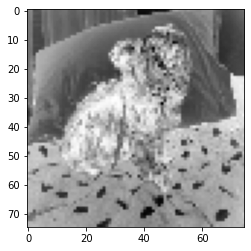

In [4]:
IMG_SIZE=75

newimg=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
plt.imshow(newimg,cmap='binary')
newimg, newimg.shape

In [5]:
#Creating a Training Dataset
training_data=[]
IMG_SIZE=75
def create_training():
    Datadir=os.path.join(os.getcwd(),"kagglecatsanddogs_5340","PetImages")
    Categories=['Dog','Cat']
    # Get into each folder
    for cat in Categories:
        path=os.path.join(Datadir,cat)
        # For each image at Path
        for img in os.listdir(path):
            try:
                img=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                newimg=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
                training_data.append([newimg,Categories.index(cat)])
            except Exception as e:
                pass   
create_training()

In [6]:
len(training_data)

24946

In [7]:
# Shuffle the dataset
import random
random.shuffle(training_data)

In [28]:
training_data[0][0][0]

array([ 56,  58,  61,  61,  62,  62,  61,  62,  63,  62,  62,  62,  63,
        64,  66,  78,  94,  96,  98,  98,  98,  98,  99,  97,  97,  95,
        87,  57,  17,  34,   9,   8,  21,  23,  25,  19,  10,  12,  23,
        22, 108, 110, 111, 108, 107, 107, 105, 104, 102,  98,  96,  88,
        77,  68,  65,  63,  62,  54,  55,  54,  52,  52,  52,  51,  51,
        50,  49,  48,  46,  45,  44,  45,  43,  39,  41], dtype=uint8)

In [45]:
X=[]
Y=[]

for features,target in training_data:
    X.append(features)
    Y.append(target)
    
Y=np.array(Y)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X.shape
# print(Y)
# Pickel save & load

(24946, 75, 75, 1)

In [35]:
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Flatten,Dense,Dropout,Activation
from keras.utils import normalize

In [42]:
X=normalize(X)

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

#Input layer
model.add(Flatten())
#Hidden Layer
model.add(Dense(64))
#Output Layer
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,Y,batch_size=32,validation_split=0.1,verbose=1,epochs=3)

Epoch 1/3
702/702 [==============================] - 109s 154ms/step - loss: 0.6952 - accuracy: 0.5002 - val_loss: 0.6953 - val_accuracy: 0.4922
Epoch 2/3
702/702 [==============================] - 163s 233ms/step - loss: 0.6938 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4982
Epoch 3/3
702/702 [==============================] - 141s 201ms/step - loss: 0.6917 - accuracy: 0.5089 - val_loss: 0.6942 - val_accuracy: 0.5070
